In [1]:
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Declare variables
#file = glob.glob('/media/shujakhalid/EncryptedDrive2/intraoperativeperformance/Autoencoder_Analysis/prdn/logs/epochs_1000_hidden_dim_1125_time_steps_9000_batch_size_10_num_layers_1_num_directions_2_dropout_11548695826/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_500_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552060503/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_5000_hidden_dim_562_time_steps_2250_batch_size_30_num_layers_1_num_directions_2_dropout_11551707925/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_5000_hidden_dim_562_time_steps_2250_batch_size_30_num_layers_1_num_directions_2_dropout_11551469417/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552425157/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_500_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552422960/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552496848/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_4_time_steps_2250_batch_size_5_num_layers_1_num_directions_2_dropout_0.31552496932/*_log.txt')
# ==================
# Used for analysis
# ------------------
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_10_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552507862/*_log.txt')
# ==================
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_150_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.31552507802/*_log.txt')
#file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/test_area/server/epochs_300_hidden_dim_4_time_steps_2250_batch_size_10_num_layers_1_num_directions_2_dropout_0.51552568767/*_log.txt')
# for NeurIPS
#file = glob.glob('/home/skhalid/Documents/intraoperativeperformance/Autoencoder_Analysis/LOG_FILES_FOR_PAPER/epochs_200_hidden_dim_600_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_activity_lstm_1557694256_louo.txt')
#file = glob.glob('/home/skhalid/Documents/intraoperativeperformance/Autoencoder_Analysis/LOG_FILES_FOR_PAPER/epochs_200_hidden_dim_600_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_activity_lstm_1557753356_loso.txt')
file = glob.glob('/media/shujakhalid/EncryptedDrive3/intraoperativeperformance/Autoencoder_Analysis/prdn_jigsaws_reg/logs/epochs_50_hidden_dim_700_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_perform_lstm_1557403873/reg_epochs_50_hidden_dim_700_time_steps_900_batch_size_10_num_layers_1_num_directions_2_dropout_0.1_perform_lstm_1557403873_loso.txt')

In [3]:
file_obj = open(file[0], "r")
file_arr = file_obj.readlines()

In [4]:
print(len(file_arr))

5408


In [5]:
# Go through all of the lines in the file array and calculate the scores for each of the runs
# by first extracting the data from the log file.
regex_1 = 'xxxxxxxxxxxxxxx run'
regex_2 = '######################### ---'
regex_3 = "preds"
regex_4 = "labls"
regex_5 = "diffs"
regex_6 = "epoch: "
regex_6b = " m-batch"
regex_7 = "trn_loss"
regex_8 = "vld_loss"
regex_9 = "vld_acc"
regex_10 = "respect_for_tissue" # respect_for_tissue
regex_11 = "suture_handling" # suture_handling
regex_12 = "time_and_motion" # time_and_motion
regex_13 = "flow_of_operation" # flow_of_operation
regex_14 = "overall_performance" # overall_performance
regex_15 = "quality_of_final_product" # quality_of_final_product

x_folds = 8
m_batches = 30 # Arbitrary no. that should be large enough to capture all reqd. data
counter = 0
data = {"run_"+str(v+1): {"batch_"+str(w+1): {regex_3: [], regex_4: [], regex_5: [], regex_6: [], regex_7: [], regex_8: [], regex_9: [], "respect_for_tissue": [], "suture_handling": [], "time_and_motion": [], "flow_of_operation": [], "overall_performance": [], "quality_of_final_product": []} for w in range(m_batches)} for v in range(x_folds)}
START_FLAG = False
#epochs = int(file[0].split('/')[-2].split('epochs_')[-1].split('_hidden')[0])
epochs = int(file[0].split('/')[-2].split('epochs_')[-1].split('_hidden')[0])

In [6]:
for indx, val in enumerate(file_arr):
    if (regex_1 in val):
        counter = counter+1
        START_FLAG = True
    elif (regex_2 in val):
        batch = 1        
    elif ("m-batch" in val):
        batch += 1
        
    if (START_FLAG):
        if (regex_3 in val):
            preds = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_3].append(preds)
        if (regex_4 in val):
            labls = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_4].append(labls)
        if (regex_5 in val):
            diffs = eval(val.split(": ")[-1])
            data["run_"+str(counter)]["batch_"+str(batch)][regex_5].append(diffs)
        if (regex_10 in val):
            respect_for_tissue = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["respect_for_tissue"].append(respect_for_tissue)
        if (regex_11 in val):
            suture_handling = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["suture_handling"].append(suture_handling)
        if (regex_12 in val):
            time_and_motion = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["time_and_motion"].append(time_and_motion)
        if (regex_13 in val):
            flow_of_operation = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["flow_of_operation"].append(flow_of_operation)
        if (regex_14 in val):
            quality_of_final_product = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["quality_of_final_product"].append(quality_of_final_product)
        if (regex_15 in val):
            overall_performance = val.split(": ")[-1][:5]
            data["run_"+str(counter)]["batch_"+str(batch)]["overall_performance"].append(overall_performance)
        if (regex_6 in val):
            epoch = eval(val.split(regex_6)[-1].split(regex_6b)[0])
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_6].append(epoch)
        if (regex_7 in val):
            trn_loss = val.split(regex_7)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_7].append(trn_loss)
        if (regex_8 in val):
            vld_loss = val.split(regex_8)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_8].append(vld_loss)
        if (regex_9 in val):
            vld_acc = val.split(regex_9)[-1].split(": ")[1][:5]
            data["run_"+str(counter)]["batch_"+str(batch-1)][regex_9].append(vld_acc)
        
#         print("run_"+str(counter))
#         print("batch_"+str(batch))
#         print(val)
#         print()
#         print(data['run_2'])
#         print()       


In [7]:
batch

2

In [8]:
regex_5

'diffs'

In [9]:
counter

8

In [10]:
#data["run_"+str(counter)]["batch_"+str(2)]["diffs"]

In [11]:
data["run_"+str(counter)]["batch_"+str(batch)][regex_5]

[]

In [12]:
data['run_1'].keys()

dict_keys(['batch_1', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_14', 'batch_15', 'batch_16', 'batch_17', 'batch_18', 'batch_19', 'batch_20', 'batch_21', 'batch_22', 'batch_23', 'batch_24', 'batch_25', 'batch_26', 'batch_27', 'batch_28', 'batch_29', 'batch_30'])

In [13]:
def rmse(diffs):
    return np.sqrt(((diffs) ** 2).mean())

In [20]:
# Plotting the training losses:
def metrics(run):
    trn_loss_arr = [np.array([float(v) for v in data[run][key]["trn_loss"]]) for key in data['run_1'].keys()]
    trn_loss_arr = np.array([x for x in trn_loss_arr if x!=[]])
    trn_loss_arr_mean = np.mean(trn_loss_arr, axis=0)

    vld_loss_arr = [np.array([float(v) for v in data[run][key]["vld_loss"]]) for key in data['run_1'].keys()]
    vld_loss_arr = np.array([x for x in vld_loss_arr if x!=[]])
    vld_loss_arr_mean = np.mean(vld_loss_arr, axis=0)

#     vld_acc_arr = [np.array([float(v.split('%')[0]) for v in data[run][key]["vld_acc"]]) for key in data['run_1'].keys()]
#     vld_acc_arr = np.array([x for x in vld_acc_arr if x!=[]])
#     vld_acc_arr_mean = np.mean(vld_acc_arr, axis=0)
    vld_acc_arr_mean = 0

    # respect_for_tissue
    respect_for_tissue_arr = [np.array([float(v) for v in data[run][key]["respect_for_tissue"]]) for key in data['run_1'].keys()]
    respect_for_tissue_arr = np.array([x for x in respect_for_tissue_arr if x!=[]])
    respect_for_tissue_mean = np.mean(respect_for_tissue_arr, axis=0)
    
    # suture_handling
    suture_handling_arr = [np.array([float(v) for v in data[run][key]["suture_handling"]]) for key in data['run_1'].keys()]
    suture_handling_arr = np.array([x for x in suture_handling_arr if x!=[]])
    suture_handling_mean = np.mean(suture_handling_arr, axis=0)
    
    # time_and_motion
    time_and_motion_arr = [np.array([float(v) for v in data[run][key]["time_and_motion"]]) for key in data['run_1'].keys()]
    time_and_motion_arr = np.array([x for x in time_and_motion_arr if x!=[]])
    time_and_motion_mean = np.mean(time_and_motion_arr, axis=0)
    
    # flow_of_operation
    flow_of_operation_arr = [np.array([float(v) for v in data[run][key]["flow_of_operation"]]) for key in data['run_1'].keys()]
    flow_of_operation_arr = np.array([x for x in flow_of_operation_arr if x!=[]])
    flow_of_operation_mean = np.mean(flow_of_operation_arr, axis=0)
    
    # overall_performance
    overall_performance_arr = [np.array([float(v) for v in data[run][key]["overall_performance"]]) for key in data['run_1'].keys()]
    overall_performance_arr = np.array([x for x in overall_performance_arr if x!=[]])
    overall_performance_mean = np.mean(overall_performance_arr, axis=0)
    
    # quality_of_final_product
    quality_of_final_product_arr = [np.array([float(v) for v in data[run][key]["quality_of_final_product"]]) for key in data['run_1'].keys()]
    quality_of_final_product_arr = np.array([x for x in quality_of_final_product_arr if x!=[]])
    quality_of_final_product_mean = np.mean(quality_of_final_product_arr, axis=0)
    
    vld_rmse = [np.array(data[run][key]["diffs"]) for key in data['run_1'].keys()]
    vld_rmse = np.array([x for x in vld_rmse if x!=[]])
    vld_rmse_mean = np.mean(vld_rmse, axis=0)
    
    return trn_loss_arr_mean, vld_loss_arr_mean, vld_acc_arr_mean, vld_rmse_mean, respect_for_tissue_mean, suture_handling_mean, time_and_motion_mean, flow_of_operation_mean, overall_performance_mean, quality_of_final_product_mean


respect_for_tissue_mean accuracies: 30.0
suture_handling_mean accuracies: 60.0
time_and_motion_mean accuracies: 70.0
flow_of_operation_mean accuracies: 40.0
overall_performance_mean accuracies: 50.0
quality_of_final_product_mean accuracies: 60.0
val_rmse: 0.9416666666666667

respect_for_tissue_mean accuracies: 30.0
suture_handling_mean accuracies: 50.0
time_and_motion_mean accuracies: 10.0
flow_of_operation_mean accuracies: 70.0
overall_performance_mean accuracies: 30.0
quality_of_final_product_mean accuracies: 50.0
val_rmse: 0.9766666666666667

respect_for_tissue_mean accuracies: 40.0
suture_handling_mean accuracies: 90.0
time_and_motion_mean accuracies: 40.0
flow_of_operation_mean accuracies: 90.0
overall_performance_mean accuracies: 80.0
quality_of_final_product_mean accuracies: 60.0
val_rmse: 0.6566666666666666

respect_for_tissue_mean accuracies: 80.0
suture_handling_mean accuracies: 70.0
time_and_motion_mean accuracies: 30.0
flow_of_operation_mean accuracies: 60.0
overall_perfor

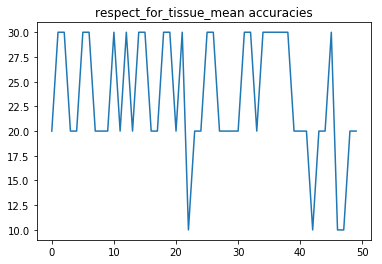

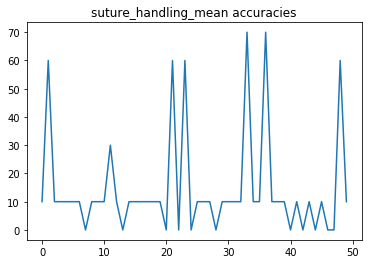

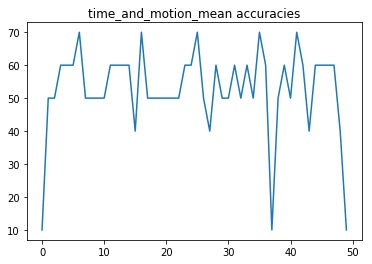

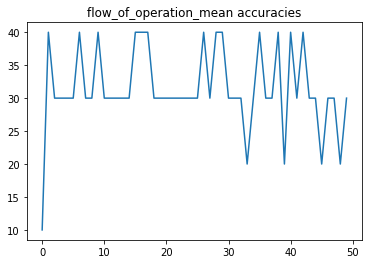

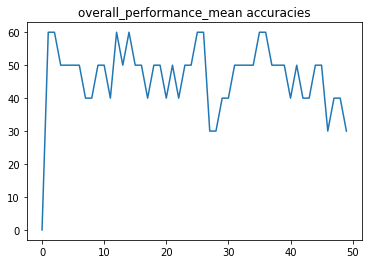

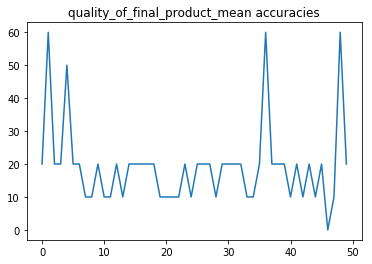

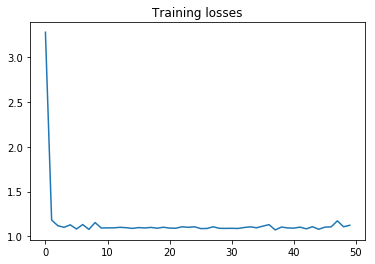

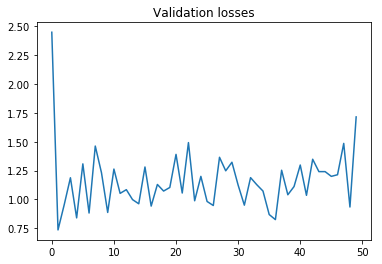

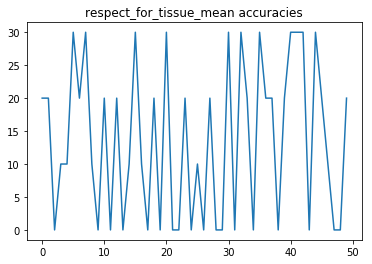

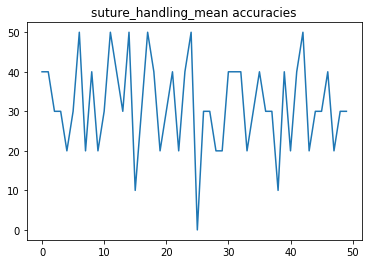

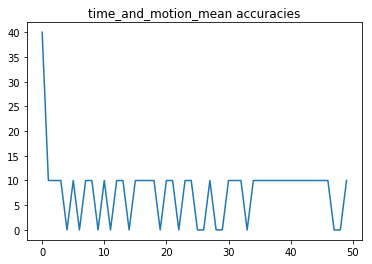

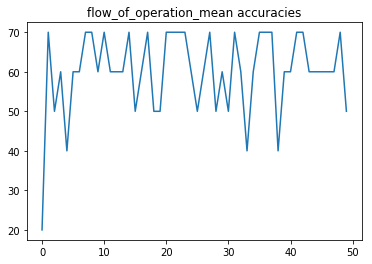

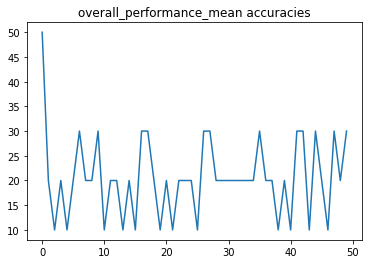

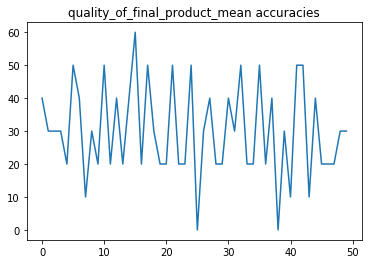

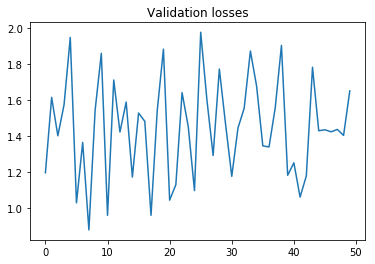

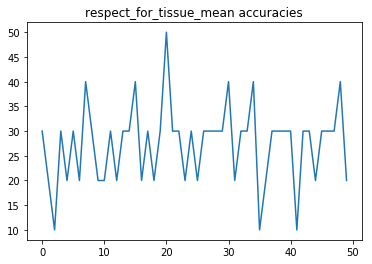

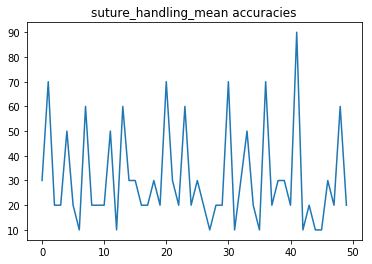

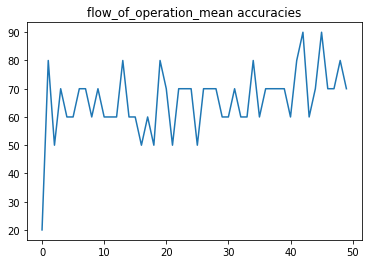

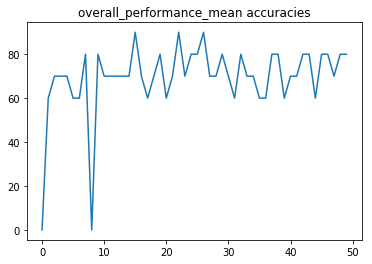

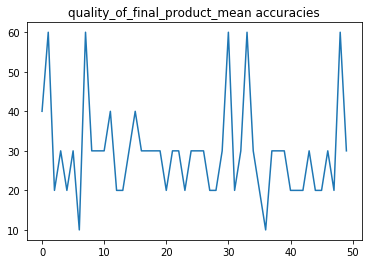

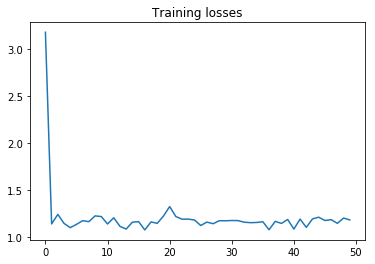

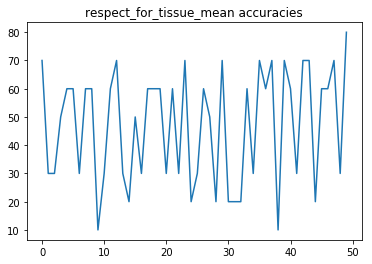

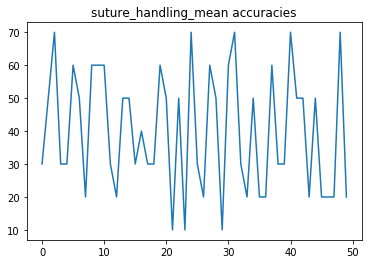

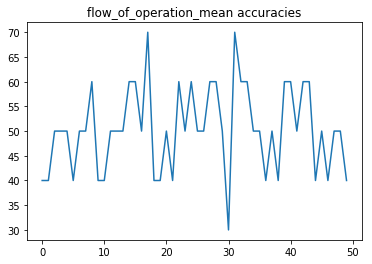

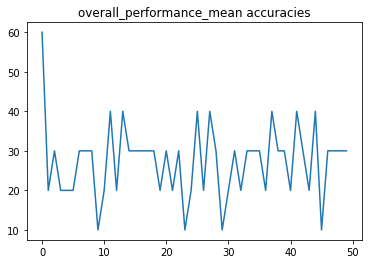

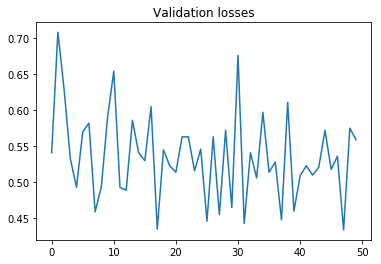

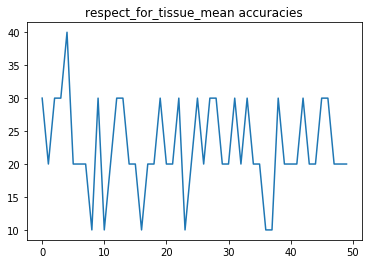

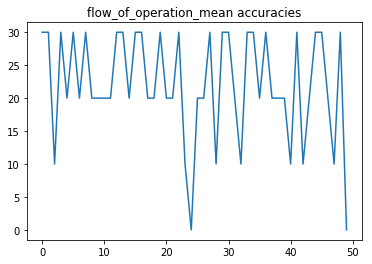

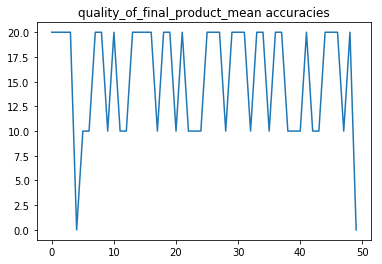

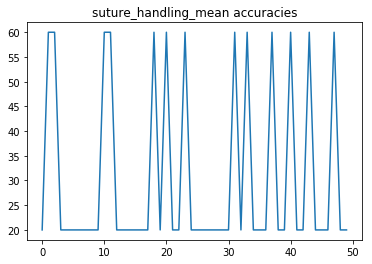

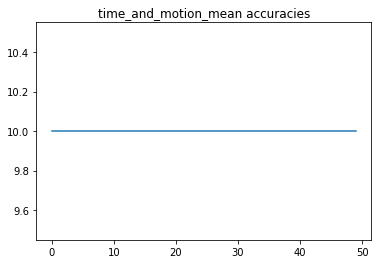

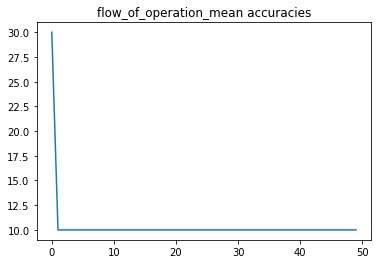

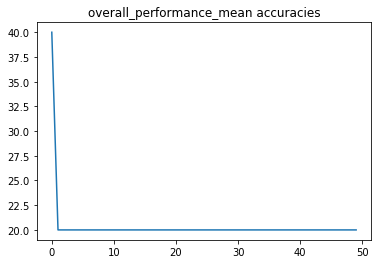

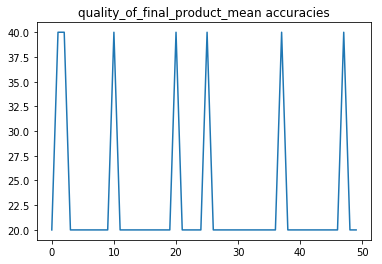

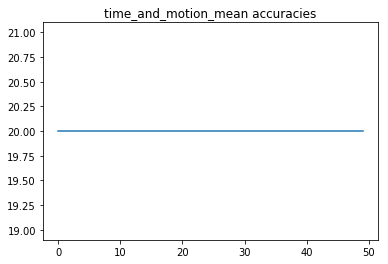

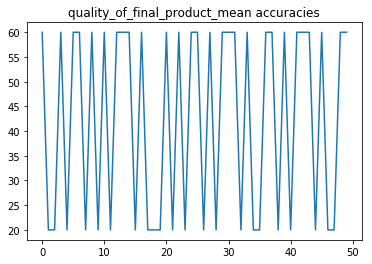

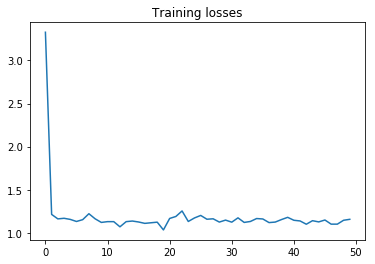

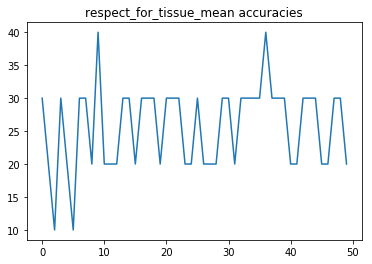

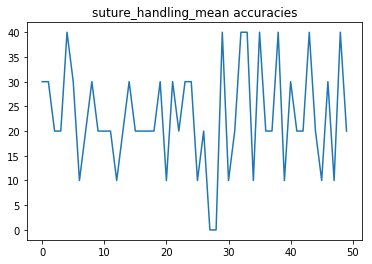

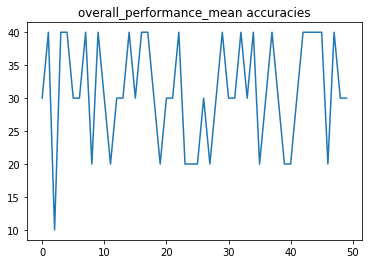

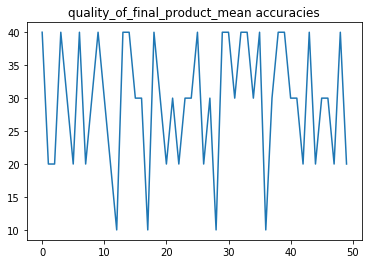

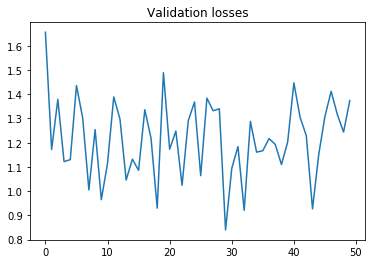

In [24]:
# Validation accuracies (for each batch):
trn_loss_arr_batch = []
vld_loss_arr_batch = []
vld_acc_arr_batch = []
val_rmse = []
respect_for_tissue_mean_arr = [] 
suture_handling_mean_arr = [] 
time_and_motion_mean_arr = [] 
flow_of_operation_mean_arr = [] 
overall_performance_mean_arr = [] 
quality_of_final_product_mean_arr = []
lim_a = 40
lim_b = 50

for i in range(x_folds):
    # Snip contains the entire set of 100 elements 
    # for each of the 100 epochs
    
    test_run = 'run_'+str(i+1)
    trn_loss_arr_mean, vld_loss_arr_mean, vld_acc_arr_mean, vld_rmse_mean, respect_for_tissue_mean, suture_handling_mean, time_and_motion_mean, flow_of_operation_mean, overall_performance_mean, quality_of_final_product_mean = metrics(test_run)
    
#     trn_loss_arr_batch.append(trn_loss_arr_mean)
#     vld_loss_arr_batch.append(vld_loss_arr_mean)
#     vld_acc_arr_batch.append(vld_acc_arr_mean)
#     kt_arr_batch.append(kt)
#     np_arr_batch.append(np)
#     sh_arr_batch.append(sh)

    #plt.figure()
    #plt.title('Validation accuracies')
    #plt.plot(vld_acc_arr_mean)
    plt.figure()
    plt.title('respect_for_tissue_mean accuracies')
    plt.plot(respect_for_tissue_mean)
    plt.figure()
    plt.title('suture_handling_mean accuracies')
    plt.plot(suture_handling_mean)
    plt.figure()
    plt.title('time_and_motion_mean accuracies')
    plt.plot(time_and_motion_mean)
    plt.figure()
    plt.title('flow_of_operation_mean accuracies')
    plt.plot(flow_of_operation_mean)
    plt.figure()
    plt.title('overall_performance_mean accuracies')
    plt.plot(overall_performance_mean)
    plt.figure()
    plt.title('quality_of_final_product_mean accuracies')
    plt.plot(quality_of_final_product_mean)
    plt.figure()
    plt.title('Training losses')
    plt.plot(trn_loss_arr_mean)
    plt.figure()
    plt.title('Validation losses')
    plt.plot(vld_loss_arr_mean)
    
    print()
    #print('vld_acc: {}'.format(np.max(vld_acc_arr_mean[lim_a:lim_b])))
    print('respect_for_tissue_mean accuracies: {}'.format(np.max(respect_for_tissue_mean[lim_a:lim_b])))
    print('suture_handling_mean accuracies: {}'.format(np.max(suture_handling_mean[lim_a:lim_b])))
    print('time_and_motion_mean accuracies: {}'.format(np.max(time_and_motion_mean[lim_a:lim_b])))
    print('flow_of_operation_mean accuracies: {}'.format(np.max(flow_of_operation_mean[lim_a:lim_b])))
    print('overall_performance_mean accuracies: {}'.format(np.max(overall_performance_mean[lim_a:lim_b])))
    print('quality_of_final_product_mean accuracies: {}'.format(np.max(quality_of_final_product_mean[lim_a:lim_b])))
    print('val_rmse: {}'.format(np.mean(vld_rmse_mean[lim_a:lim_b])))
    
    val_rmse.append(np.mean(vld_rmse_mean[lim_a:lim_b]))
    respect_for_tissue_mean_arr.append(np.max(respect_for_tissue_mean[lim_a:lim_b]))
    suture_handling_mean_arr.append(np.max(suture_handling_mean[lim_a:lim_b]))
    time_and_motion_mean_arr.append(np.max(time_and_motion_mean[lim_a:lim_b]))
    flow_of_operation_mean_arr.append(np.max(flow_of_operation_mean[lim_a:lim_b]))
    overall_performance_mean_arr.append(np.max(overall_performance_mean[lim_a:lim_b]))
    quality_of_final_product_mean_arr.append(np.max(quality_of_final_product_mean[lim_a:lim_b]))
    
# trn_loss_arr_batch = np.array(trn_loss_arr_batch)
# vld_loss_arr_batch = np.array(vld_loss_arr_batch)
# vld_acc_arr_batch = np.array(vld_acc_arr_batch)
print()
print('final mean_rmse accuracies: {}'.format(np.mean(val_rmse)))
print('final respect_for_tissue_mean accuracies: {}'.format(np.mean(respect_for_tissue_mean_arr)))
print('final suture_handling_mean accuracies: {}'.format(np.mean(suture_handling_mean_arr)))
print('final time_and_motion_mean accuracies: {}'.format(np.mean(time_and_motion_mean_arr)))
print('final flow_of_operation_mean accuracies: {}'.format(np.mean(flow_of_operation_mean_arr)))
print('final overall_performance_mean accuracies: {}'.format(np.mean(overall_performance_mean_arr)))
print('final quality_of_final_product_mean accuracies: {}'.format(np.mean(quality_of_final_product_mean_arr)))
print()

# # Find the batch mean
# trn_loss_arr_batch_mean = np.mean(trn_loss_arr_batch, axis=0)
# vld_loss_arr_batch_mean = np.mean(vld_loss_arr_batch, axis=0)
# vld_acc_arr_batch_mean = np.mean(vld_acc_arr_batch, axis=0)
    
# plt.figure()
# plt.title('Training losses')
# plt.plot(trn_loss_arr_batch_mean)

# plt.figure()
# plt.title('Validation losses')
# plt.plot(vld_loss_arr_batch_mean)

# plt.figure()
# plt.title('Validation accuracies')
# plt.plot(vld_acc_arr_batch_mean)

In [ ]:
# print(np.mean(vld_acc_arr_batch[0][96-5:96+5]))
# print(np.mean(vld_acc_arr_batch[1][70-5:70+5]))
# print(np.mean(vld_acc_arr_batch[2][58-5:58+5]))
# print(np.mean(vld_acc_arr_batch[3][62-5:62+5]))
# print(np.mean(vld_acc_arr_batch[4][62-5:62+5]))
# print(np.mean(vld_acc_arr_batch[5][61-5:61+5]))
# print(np.mean(vld_acc_arr_batch[6][60-5:60+5]))
# print(np.mean(vld_acc_arr_batch[7][60-5:60+5]))
# print(np.mean(vld_acc_arr_batch[8][59-5:59+5]))
# print(np.mean(vld_acc_arr_batch[9][61-5:61+5]))

In [ ]:
# print(vld_rmse)

In [ ]:
#test
preds = [[3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0], [3.0, 2.0, 2.0, 3.0, 2.0, 3.0]]
labls = [[3.0, 2.0, 2.0, 3.0, 3.0, 3.0], [3.0, 2.0, 2.0, 4.0, 3.0, 4.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 2.0, 1.0, 2.0, 2.0, 3.0], [5.0, 5.0, 4.0, 5.0, 5.0, 5.0], [1.0, 2.0, 1.0, 2.0, 2.0, 2.0], [1.0, 2.0, 1.0, 3.0, 2.0, 3.0], [4.0, 4.0, 3.0, 4.0, 4.0, 4.0], [1.0, 2.0, 2.0, 2.0, 2.0, 3.0], [4.0, 3.0, 3.0, 3.0, 3.0, 4.0]]

In [ ]:
# import numpy as np
# diff = np.array([p[0] for p in preds])-np.array([l[0] for l in labls])
# num = len(np.where(num==0)[0])
# den = len([p[0] for p in preds])
# return num/den
# print('Percentage of correct predictions for respect_for_tissue: {}'.format(num/den))

In [ ]:
#[v for v in vld_acc_arr_mean]

In [ ]:
test = np.array([int(v) for v in vld_acc_arr_mean])

In [ ]:
print(test)

In [ ]:
print(np.max(test))